In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint

C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_excel('Final data.xlsx')
df.head()

,CompanyName,Year,Investment_type,sector,Sub_sector,Activity_classification,Legal_form,Headquarters_location,Capital,Procedure_type,Total_flows,Total_investment
0,Zohour Al -Sham (Hossam Hisham Al -Makhlalati),2013.0,S 8. An internal investment,Agricultural,Land reclamation and farming,Land reclamation and farming,Individually,Giza,655400.0,Establishing,300000.0,2579.9
1,Zidane for ready -made clothes (Ibrahim Jamil ...,2013.0,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,Establishing,350000.0,12272.4
2,Zidane for ready -made clothes (Ibrahim Jamil ...,2013.0,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,Establishing,350000.0,9575.7
3,Zidane for ready -made clothes (Ibrahim Jamil ...,2013.0,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,Establishing,350000.0,1171.3
4,Zidane for ready -made clothes (Ibrahim Jamil ...,2013.0,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,Establishing,350000.0,0.0


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 CompanyName                   24
Year                          24
Investment_type               24
sector                        24
Sub_sector                    24
Activity_classification       24
Legal_form                    24
Headquarters_location         24
Capital                       24
Procedure_type                24
Total_flows                   24
Total_investment           14286
dtype: int64


In [4]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include='number').columns
# Identify categorical columns
categorical_columns = df.select_dtypes(include='object').columns
# Calculate the mean for each numeric column
mean_values = df[numeric_columns].mean()
# Fill missing values in numeric columns with their mean
df[numeric_columns] = df[numeric_columns].fillna(mean_values)
# drop missing values in categorical columns 
df = df.dropna(subset=categorical_columns)
# Verify the changes
print(df.isnull().sum())

CompanyName                0
Year                       0
Investment_type            0
sector                     0
Sub_sector                 0
Activity_classification    0
Legal_form                 0
Headquarters_location      0
Capital                    0
Procedure_type             0
Total_flows                0
Total_investment           0
dtype: int64


In [5]:
df

,CompanyName,Year,Investment_type,sector,Sub_sector,Activity_classification,Legal_form,Headquarters_location,Capital,Procedure_type,Total_flows,Total_investment
0,Zohour Al -Sham (Hossam Hisham Al -Makhlalati),2013.0,S 8. An internal investment,Agricultural,Land reclamation and farming,Land reclamation and farming,Individually,Giza,655400.0,Establishing,300000.0,2579.900000
1,Zidane for ready -made clothes (Ibrahim Jamil ...,2013.0,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,Establishing,350000.0,12272.400000
2,Zidane for ready -made clothes (Ibrahim Jamil ...,2013.0,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,Establishing,350000.0,9575.700000
3,Zidane for ready -made clothes (Ibrahim Jamil ...,2013.0,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,Establishing,350000.0,1171.300000
4,Zidane for ready -made clothes (Ibrahim Jamil ...,2013.0,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,Establishing,350000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
234599,3 ADCBX for Specialized Contracting and Supplies,2023.0,Law 159,Service,commercial services,Trade and supplies,Limited officials,Cairo,100000.0,Establishing,68000.0,7418.464615
234600,1650 for trade and distribution of coffee (Ibr...,2023.0,S 72. An internal investment,Service,commercial services,Wholesale and retail trade,A Simple recommendation,Al sharqiah,650000.0,Establishing,400000.0,7418.464615
234601,(Thar Mac 3Mac) Robert Gerges Aziz and his par...,2023.0,S 72. An internal investment,Service,commercial services,Wholesale and retail trade,A Simple recommendation,Alexandria,650000.0,Establishing,400000.0,7418.464615
234602,(Mr. Abdullah Al -Sayed Abdel Wahab and Alaa A...,2023.0,S 72. An internal investment,Industrial,Food,Mills and speculators,solidarity,Al sharqiah,650000.0,Establishing,400000.0,7418.464615


In [6]:
# Convert 'Year' to string and remove decimals
df['Year'] = df['Year'].astype(int).astype(str)

In [7]:
# Get unique values in a Year column
unique_values = df['Year'].unique()

# Print the unique values
print(unique_values)

['2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2021' '2022'
 '2023']


In [8]:
# Round numeric columns to 2 decimal places
numeric_columns = ['Capital', 'Total_flows', 'Total_investment']
df[numeric_columns] = df[numeric_columns].round(2)

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

16

In [10]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
df = df.drop('Procedure_type', axis=1)

In [12]:
df

,CompanyName,Year,Investment_type,sector,Sub_sector,Activity_classification,Legal_form,Headquarters_location,Capital,Total_flows,Total_investment
0,Zohour Al -Sham (Hossam Hisham Al -Makhlalati),2013,S 8. An internal investment,Agricultural,Land reclamation and farming,Land reclamation and farming,Individually,Giza,655400.0,300000.0,2579.90
1,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,350000.0,12272.40
2,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,350000.0,9575.70
3,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,350000.0,1171.30
4,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,100000.0,350000.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
234599,3 ADCBX for Specialized Contracting and Supplies,2023,Law 159,Service,commercial services,Trade and supplies,Limited officials,Cairo,100000.0,68000.0,7418.46
234600,1650 for trade and distribution of coffee (Ibr...,2023,S 72. An internal investment,Service,commercial services,Wholesale and retail trade,A Simple recommendation,Al sharqiah,650000.0,400000.0,7418.46
234601,(Thar Mac 3Mac) Robert Gerges Aziz and his par...,2023,S 72. An internal investment,Service,commercial services,Wholesale and retail trade,A Simple recommendation,Alexandria,650000.0,400000.0,7418.46
234602,(Mr. Abdullah Al -Sayed Abdel Wahab and Alaa A...,2023,S 72. An internal investment,Industrial,Food,Mills and speculators,solidarity,Al sharqiah,650000.0,400000.0,7418.46


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234588 entries, 0 to 234603
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CompanyName              234588 non-null  object 
 1   Year                     234588 non-null  object 
 2   Investment_type          234588 non-null  object 
 3   sector                   234588 non-null  object 
 4   Sub_sector               234588 non-null  object 
 5   Activity_classification  234588 non-null  object 
 6   Legal_form               234588 non-null  object 
 7   Headquarters_location    234588 non-null  object 
 8   Capital                  234588 non-null  float64
 9   Total_flows              234588 non-null  float64
 10  Total_investment         234588 non-null  float64
dtypes: float64(3), object(8)
memory usage: 21.5+ MB


In [14]:
df.describe()

,Capital,Total_flows,Total_investment
count,2.345880e+05,234588.000000,234588.000000
mean,2.868658e+05,342043.515815,7418.360968
std,3.272475e+06,53017.171906,8296.495405
min,1.000000e+03,68000.000000,0.000000
25%,1.000000e+05,300000.000000,2349.200000
50%,1.000000e+05,350000.000000,5045.300000
75%,3.000000e+05,350000.000000,8945.900000
max,4.000000e+08,900000.000000,43864.700000


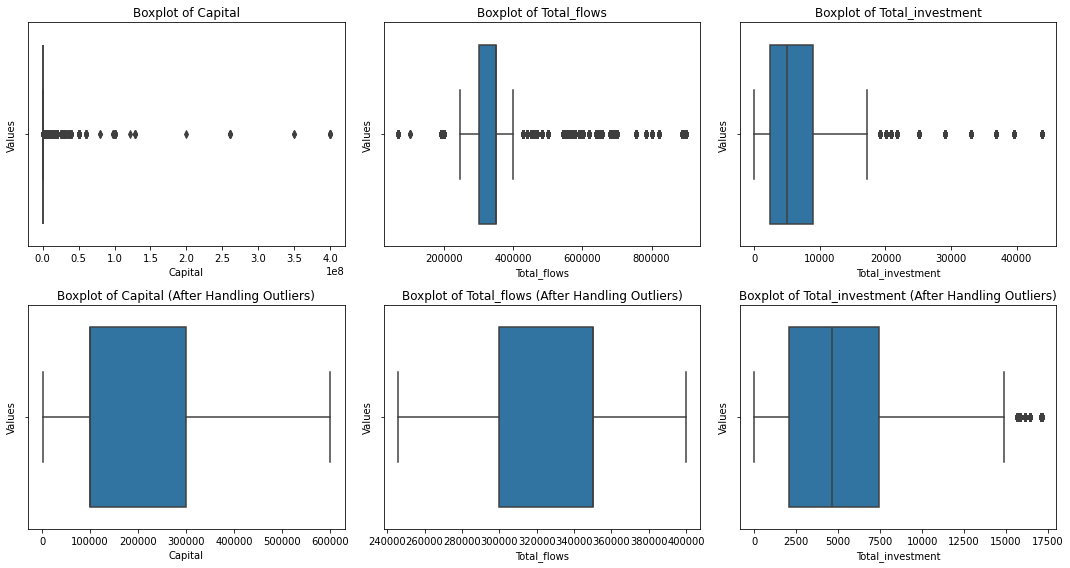

In [15]:
numeric_columns = ['Capital', 'Total_flows', 'Total_investment']
# Visualize outliers using box plots
plt.figure(figsize=(15, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')

# Detect outliers using IQR (Interquartile Range)
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Replace outliers with median value
df[numeric_columns] = df[numeric_columns].where(~outliers, df[numeric_columns].median(), axis=0)

# Visualize again after handling outliers
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i + 3)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} (After Handling Outliers)')
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


In [16]:
categorical_counts = df.groupby(['Year', 'Investment_type', 'sector', 'Sub_sector', 'Activity_classification', 'Legal_form', 'Headquarters_location']).size().reset_index(name='Count')
categorical_counts

,Year,Investment_type,sector,Sub_sector,Activity_classification,Legal_form,Headquarters_location,Count
0,2013,Law 159,Agricultural,"Animal, poultry and fish wealth","Animal production, poultry, fish wealth and feed",Limited officials,Menoufia,1
1,2013,Law 159,Agricultural,Land reclamation and farming,Land reclamation and farming,Contribution,Giza,2
2,2013,Law 159,Agricultural,Land reclamation and farming,Land reclamation and farming,Contribution,Qaliubiya,1
3,2013,Law 159,Agricultural,Land reclamation and farming,Land reclamation and farming,Limited officials,Al behairah,1
4,2013,Law 159,Agricultural,Land reclamation and farming,Land reclamation and farming,Limited officials,Cairo,1
...,...,...,...,...,...,...,...,...
18192,2023,S 72. An internal investment,Tourism,tourism,Tourism management and marketing,Limited officials,The Red Sea,2
18193,2023,S 72. An internal investment,Tourism,tourism,Tourism management and marketing,solidarity,the shortest,1
18194,2023,S 72. An internal investment,Tourism,tourism,Tourist camps,Individually,Alexandria,1
18195,2023,S 72. An internal investment,Tourism,tourism,Tourist management,Limited officials,Alexandria,2


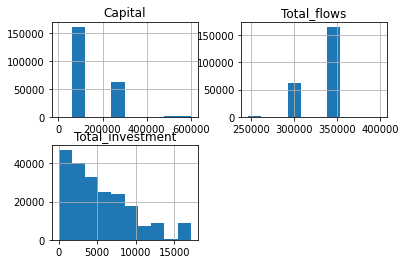

In [17]:

columns_of_interest = ['Capital', 'Total_flows', 'Total_investment']

# Use the actual list variable without quotes
df[columns_of_interest].hist()
plt.show()


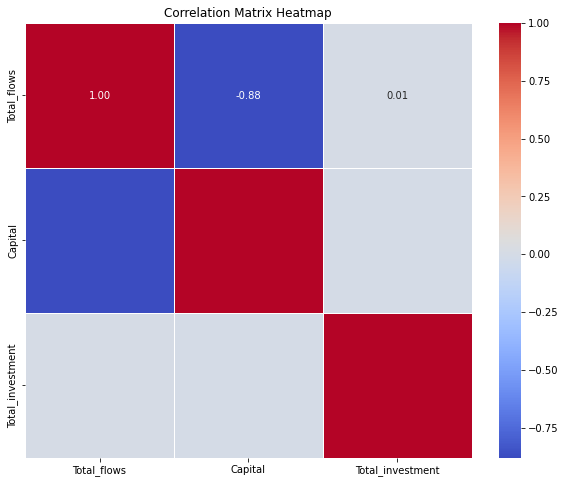

In [19]:
numerical_columns = ['Total_flows', 'Capital', 'Total_investment']

# Subset the DataFrame to include only numerical columns
numerical_df = df[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [21]:
numerical_columns = ['Capital', 'Total_flows', 'Total_investment']



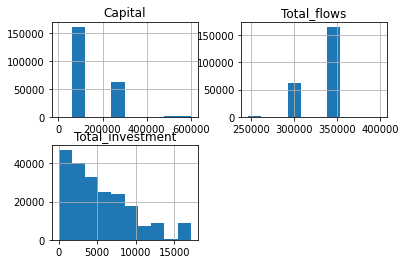

In [18]:
# Use the actual list variable without quotes
df[columns_of_interest].hist()
plt.show()

In [22]:
# Apply log transformation to each numerical column with positive values
for column in numerical_columns:
    if df[column].min() > 0:  
        df[column] = np.log1p(df[column])  

# Display the DataFrame after log transformations
print(df.head())

                                         CompanyName  Year  \
0     Zohour Al -Sham (Hossam Hisham Al -Makhlalati)  2013   
1  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
2  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
3  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
4  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   

               Investment_type        sector                    Sub_sector  \
0  S 8. An internal investment  Agricultural  Land reclamation and farming   
1  S 8. An internal investment    Industrial                       Textile   
2  S 8. An internal investment    Industrial                       Textile   
3  S 8. An internal investment    Industrial                       Textile   
4  S 8. An internal investment    Industrial                       Textile   

        Activity_classification    Legal_form Headquarters_location  Capital  \
0  Land reclamation and farming  Individually                  Giza      NaN  

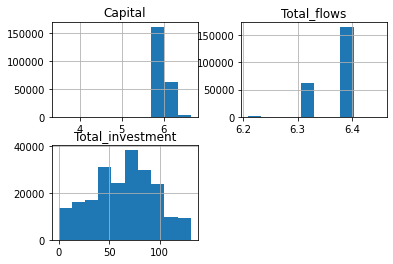

In [23]:

columns_of_interest = ['Capital', 'Total_flows', 'Total_investment']

# Use the actual list variable without quotes
df[columns_of_interest].hist()
plt.show()


In [24]:
# Apply square root transformation to each numerical column
for column in columns_of_interest:
    df[column] = np.sqrt(df[column])

# Display the DataFrame after square root transformations
print(df.head())

                                         CompanyName  Year  \
0     Zohour Al -Sham (Hossam Hisham Al -Makhlalati)  2013   
1  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
2  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
3  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
4  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   

               Investment_type        sector                    Sub_sector  \
0  S 8. An internal investment  Agricultural  Land reclamation and farming   
1  S 8. An internal investment    Industrial                       Textile   
2  S 8. An internal investment    Industrial                       Textile   
3  S 8. An internal investment    Industrial                       Textile   
4  S 8. An internal investment    Industrial                       Textile   

        Activity_classification    Legal_form Headquarters_location   Capital  \
0  Land reclamation and farming  Individually                  Giza       NaN

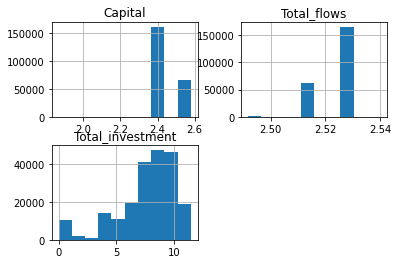

In [25]:
df[columns_of_interest].hist()
plt.show()


In [26]:
# Apply cube root transformation to each numerical column
for column in numerical_columns:
    df[column] = np.cbrt(df[column])

# Display the DataFrame after cube root transformations
print(df.head())


                                         CompanyName  Year  \
0     Zohour Al -Sham (Hossam Hisham Al -Makhlalati)  2013   
1  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
2  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
3  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
4  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   

               Investment_type        sector                    Sub_sector  \
0  S 8. An internal investment  Agricultural  Land reclamation and farming   
1  S 8. An internal investment    Industrial                       Textile   
2  S 8. An internal investment    Industrial                       Textile   
3  S 8. An internal investment    Industrial                       Textile   
4  S 8. An internal investment    Industrial                       Textile   

        Activity_classification    Legal_form Headquarters_location   Capital  \
0  Land reclamation and farming  Individually                  Giza       NaN

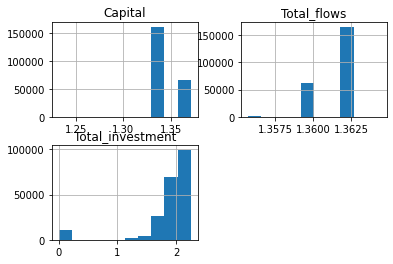

In [27]:
df[columns_of_interest].hist()
plt.show()

In [28]:
# Apply log transformation with a constant offset to each numerical column
for column in numerical_columns:
    df[column] = np.log(df[column] + 1e-5)  

# Display the DataFrame after log transformations with offset
df.head()


,CompanyName,Year,Investment_type,sector,Sub_sector,Activity_classification,Legal_form,Headquarters_location,Capital,Total_flows,Total_investment
0,Zohour Al -Sham (Hossam Hisham Al -Makhlalati),2013,S 8. An internal investment,Agricultural,Land reclamation and farming,Land reclamation and farming,Individually,Giza,NaN,0.306966,0.654631
1,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,0.291819,0.308987,0.784597
2,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,0.291819,0.308987,0.763920
3,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,0.291819,0.308987,0.588828
4,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,0.291819,0.308987,-11.512925


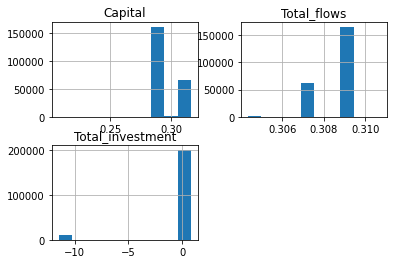

In [29]:
df[columns_of_interest].hist()
plt.show()

In [30]:
# Initialize QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal')

# Apply Quantile Transformation to each numerical column
df[numerical_columns] = quantile_transformer.fit_transform(df[numerical_columns])

# Display the DataFrame after Quantile Transformation
print(df.head())


                                         CompanyName  Year  \
0     Zohour Al -Sham (Hossam Hisham Al -Makhlalati)  2013   
1  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
2  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
3  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   
4  Zidane for ready -made clothes (Ibrahim Jamil ...  2013   

               Investment_type        sector                    Sub_sector  \
0  S 8. An internal investment  Agricultural  Land reclamation and farming   
1  S 8. An internal investment    Industrial                       Textile   
2  S 8. An internal investment    Industrial                       Textile   
3  S 8. An internal investment    Industrial                       Textile   
4  S 8. An internal investment    Industrial                       Textile   

        Activity_classification    Legal_form Headquarters_location   Capital  \
0  Land reclamation and farming  Individually                  Giza       NaN

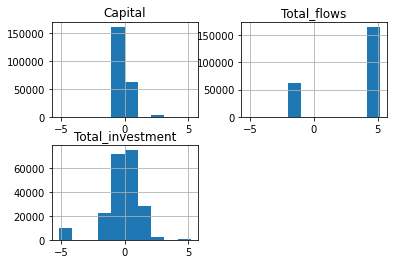

In [31]:
df[columns_of_interest].hist()
plt.show()

In [32]:
numerical_columns = ['Capital', 'Total_flows', 'Total_investment']

# Initialize the MinMaxScaler and apply Min-Max scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [33]:
# Calculate ROI
df['ROI'] = ((df['Total_flows'] - (df['Capital'] + df['Total_investment'])) / (df['Capital'] + df['Total_investment'])) * 100


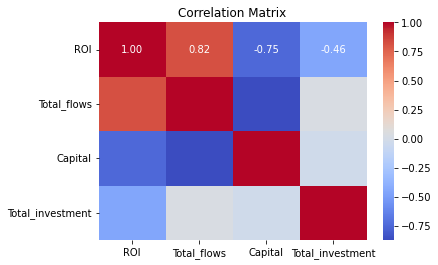

In [34]:
# Calculate correlation matrix
correlation_matrix = df[['ROI', 'Total_flows', 'Capital', 'Total_investment']].corr()

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [37]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


CompanyName                0
Year                       0
Investment_type            0
sector                     0
Sub_sector                 0
Activity_classification    0
Legal_form                 0
Headquarters_location      0
Capital                    0
Total_flows                0
Total_investment           0
ROI                        0
dtype: int64


In [38]:
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in the 'ROI' column
df.dropna(subset=['ROI'], inplace=True)

# Check the statistics again
print(df['ROI'].describe())

count    199882.000000
mean          0.147573
std           0.062985
min           0.000000
25%           0.069939
50%           0.163801
75%           0.178445
max           1.000000
Name: ROI, dtype: float64


In [26]:
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df[['ROI', 'Total_flows', 'Capital', 'Total_investment']] = imputer.fit_transform(df[['ROI', 'Total_flows', 'Capital', 'Total_investment']])

In [27]:
df.describe()


,Capital,Total_flows,Total_investment,ROI,Interaction_Term
count,199882.000000,199882.000000,199882.000000,199882.000000,199882.000000
mean,11.823946,12.723629,5203.912937,-93.862388,66214.631364
std,0.506418,0.070067,4188.285000,23.005466,53270.570490
min,6.908755,12.413091,0.000000,-99.927650,0.000000
25%,11.512935,12.611541,2100.000000,-99.828187,26484.236283
50%,11.512935,12.765691,4630.800000,-99.725014,58431.122175
75%,12.611541,12.765691,7418.460000,-99.395424,94701.770212
max,13.304687,12.899222,17145.600000,38.600227,218875.436592


In [39]:
print(df['ROI'].unique())

[-51.38630979 -50.31819638 -39.12992827 ... -69.18837331 -61.9863343
 -70.1712961 ]


In [36]:
numerical_columns = ['Capital', 'Total_flows', 'Total_investment', 'ROI']

# Initialize the MinMaxScaler and apply Min-Max scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [41]:
print(df['ROI'].unique())


[0.17306199 0.17686441 0.21669402 ... 0.10968765 0.1353265  0.1061885 ]


In [42]:
#sns.histplot(df['ROI'].sample(n=10000), kde=True)


<Axes: xlabel='ROI', ylabel='Count'>

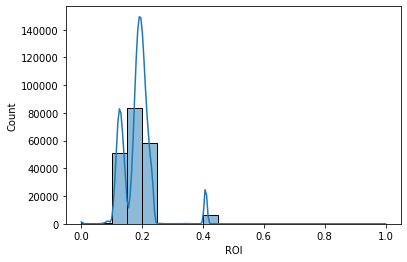

In [42]:
sns.histplot(df['ROI'], kde=True, bins=20)


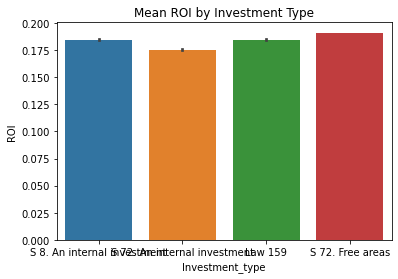

In [43]:
categorical_columns = ['CompanyName','Investment_type', 'sector', 'Sub_sector', 'Activity_classification', 'Legal_form', 'Headquarters_location']

# Group data by categorical columns and visualize the mean ROI for each group
mean_roi_by_category = df.groupby(categorical_columns)['ROI'].mean().reset_index()

# Visualize the mean ROI using a barplot
sns.barplot(x='Investment_type', y='ROI', data=mean_roi_by_category)
plt.title('Mean ROI by Investment Type')
plt.show()

In [28]:
# Calculate the 25th percentile and 75th percentile of ROI
percentile_25 = df['ROI'].quantile(0.25)
percentile_75 = df['ROI'].quantile(0.75)

# Create a binary column 'Attractive' based on percentiles
df['Attractive'] = ((df['ROI'] >= percentile_25) & (df['ROI'] <= percentile_75)).astype(int)


In [29]:
print(df['Attractive'].unique())


[0 1]


In [30]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 CompanyName                0
Year                       0
Investment_type            0
sector                     0
Sub_sector                 0
Activity_classification    0
Legal_form                 0
Headquarters_location      0
Capital                    0
Total_flows                0
Total_investment           0
ROI                        0
Interaction_Term           0
Attractive                 0
dtype: int64


In [47]:
df

,CompanyName,Year,Investment_type,sector,Sub_sector,Activity_classification,Legal_form,Headquarters_location,Capital,Total_flows,Total_investment,ROI,Attractive
1,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,0.464332,0.533224,0.632528,0.173062,1
2,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,0.464332,0.533224,0.608946,0.176864,1
3,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,0.464332,0.533224,0.411672,0.216694,0
4,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,0.464332,0.533224,0.000000,0.408813,0
5,Zidane for ready -made clothes (Ibrahim Jamil ...,2013,S 8. An internal investment,Industrial,Textile,Ready-made,Individually,Qaliubiya,0.464332,0.533224,0.498432,0.197167,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234587,A Center for Training and Development of Human...,2023,S 72. An internal investment,Service,educational services,Training centers,Individually,the shortest,0.464332,0.533224,0.561495,0.185046,1
234588,A business partner for information technology,2023,Law 159,Communications and information technology,information technology,Computers and software,Limited officials,Menoufia,0.464332,0.533224,0.561495,0.185046,1
234589,A business meeting to catch workers,2023,Law 159,Service,Human resource services,Laying employment,Limited officials,Qaliubiya,0.464332,0.533224,0.561495,0.185046,1
234590,A and M. to catch workers inside,2023,Law 159,Service,Human resource services,Laying employment,Limited officials,Giza,0.464332,0.533224,0.561495,0.185046,1


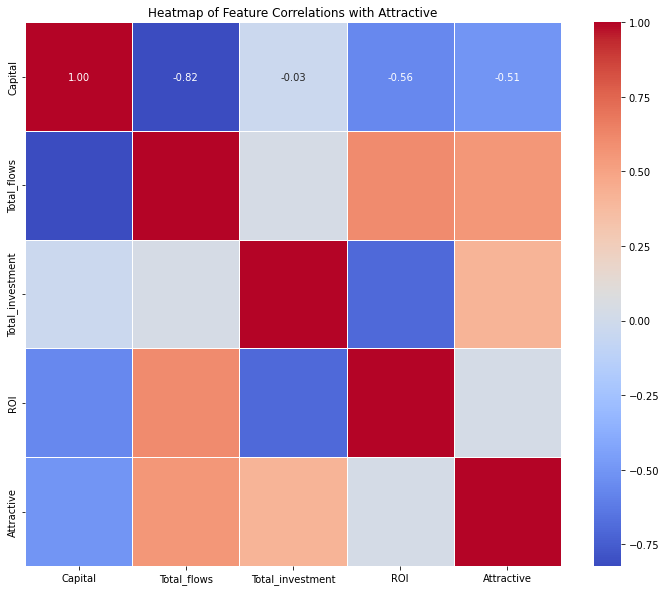

In [48]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Concatenate the target column 'ROI_category' with numerical features
data_for_heatmap = pd.concat([numerical_features, df['Attractive']], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_for_heatmap.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Heatmap of Feature Correlations with Attractive')

# Show the plot
plt.show()


In [49]:
# Split the data into train, test, and validate sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

# Print the column names of the train_df to verify
print("Train DataFrame Columns:", train_df.columns)

# Apply Target Encoding on the training set
encoder = ce.TargetEncoder(cols=categorical_columns)
train_encoded = encoder.fit_transform(train_df[categorical_columns], train_df['Attractive'])

# Apply the learned encoding to the validation and test sets
val_encoded = encoder.transform(val_df[categorical_columns])
test_encoded = encoder.transform(test_df[categorical_columns])

# Combine the encoded features with the original features
train_encoded = pd.concat([train_df.drop(categorical_columns, axis=1), train_encoded], axis=1)
val_encoded = pd.concat([val_df.drop(categorical_columns, axis=1), val_encoded], axis=1)
test_encoded = pd.concat([test_df.drop(categorical_columns, axis=1), test_encoded], axis=1)

# Display the encoded datasets
print("\nEncoded Training Set:")
print(train_encoded)
print("\nEncoded Validation Set:")
print(val_encoded)
print("\nEncoded Test Set:")
print(test_encoded)

Train DataFrame Columns: Index(['CompanyName', 'Year', 'Investment_type', 'sector', 'Sub_sector',
       'Activity_classification', 'Legal_form', 'Headquarters_location',
       'Capital', 'Total_flows', 'Total_investment', 'ROI', 'Attractive'],
      dtype='object')

Encoded Training Set:
        Year   Capital  Total_flows  Total_investment       ROI  Attractive  \
126734  2019  0.464332     0.533224          0.398937  0.219891           0   
124070  2019  0.599608     0.394864          0.488633  0.129171           0   
210111  2021  0.599608     0.394864          0.673582  0.110407           0   
137595  2019  0.464332     0.533224          0.496018  0.197662           1   
12979   2014  0.464332     0.533224          0.394204  0.221103           0   
...      ...       ...          ...               ...       ...         ...   
61497   2017  0.464332     0.533224          0.528397  0.191215           1   
46138   2016  0.464332     0.533224          0.471350  0.202873           1  

In [50]:
df = df.drop('ROI', axis=1)


In [51]:
# Define features and target
X_train = train_encoded.drop('Attractive', axis=1)
y_train = train_encoded['Attractive']

X_val = val_encoded.drop('Attractive', axis=1)
y_val = val_encoded['Attractive']

X_test = test_encoded.drop('Attractive', axis=1)
y_test = test_encoded['Attractive']

# Initialize SelectKBest with the f_classif scoring function
k_best = SelectKBest(f_classif, k=5)

# Fit SelectKBest to the training data
X_train_selected = k_best.fit_transform(X_train, y_train)

# Transform the validation and test sets to only include the selected features
X_val_selected = k_best.transform(X_val)
X_test_selected = k_best.transform(X_test)


In [52]:

# Initialize and train the Logistic Regression model
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_val_pred = logistic_reg.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on Validation Set: {accuracy_val}")

# Print classification report
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = logistic_reg.predict(X_test_selected)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy on Test Set: {accuracy_test}")

# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Accuracy on Validation Set: 0.8227436461877127

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     19909
           1       0.81      0.84      0.83     20067

    accuracy                           0.82     39976
   macro avg       0.82      0.82      0.82     39976
weighted avg       0.82      0.82      0.82     39976


Accuracy on Test Set: 0.8248198919351611

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     19646
           1       0.82      0.84      0.83     20330

    accuracy                           0.82     39976
   macro avg       0.82      0.82      0.82     39976
weighted avg       0.82      0.82      0.82     39976



In [53]:
# Initialize and train the Neural Network (Multi-Layer Perceptron) model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_val_pred = mlp_classifier.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on Validation Set: {accuracy_val}")

# Print classification report
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = mlp_classifier.predict(X_test_selected)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy on Test Set: {accuracy_test}")

# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Accuracy on Validation Set: 0.9801380828497098

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19909
           1       0.98      0.98      0.98     20067

    accuracy                           0.98     39976
   macro avg       0.98      0.98      0.98     39976
weighted avg       0.98      0.98      0.98     39976


Accuracy on Test Set: 0.9793876325795478

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19646
           1       0.98      0.98      0.98     20330

    accuracy                           0.98     39976
   macro avg       0.98      0.98      0.98     39976
weighted avg       0.98      0.98      0.98     39976



In [54]:
# Initialize and train the Gaussian Naive Bayes model
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_val_pred = gnb_classifier.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on Validation Set: {accuracy_val}")

# Print classification report
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = gnb_classifier.predict(X_test_selected)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy on Test Set: {accuracy_test}")

# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


Accuracy on Validation Set: 0.7799429657794676

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.85      0.68      0.75     19909
           1       0.73      0.88      0.80     20067

    accuracy                           0.78     39976
   macro avg       0.79      0.78      0.78     39976
weighted avg       0.79      0.78      0.78     39976


Accuracy on Test Set: 0.7820942565539324

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.68      0.76     19646
           1       0.74      0.88      0.80     20330

    accuracy                           0.78     39976
   macro avg       0.79      0.78      0.78     39976
weighted avg       0.79      0.78      0.78     39976



In [55]:
# Initialize and train the Support Vector Classifier (SVC)
svc_classifier = SVC(random_state=42)
svc_classifier.fit(X_train_selected, y_train)

# Make predictions on the validation set
y_val_pred = svc_classifier.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on Validation Set: {accuracy_val}")

# Print classification report with zero_division parameter set to 'warn'
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred, zero_division='warn'))

# Make predictions on the test set
y_test_pred = svc_classifier.predict(X_test_selected)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy on Test Set: {accuracy_test}")

# Print classification report with zero_division parameter set to 'warn'
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, zero_division='warn'))

Accuracy on Validation Set: 0.9739843906343806

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     19909
           1       0.97      0.98      0.97     20067

    accuracy                           0.97     39976
   macro avg       0.97      0.97      0.97     39976
weighted avg       0.97      0.97      0.97     39976


Accuracy on Test Set: 0.9733340004002401

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     19646
           1       0.97      0.98      0.97     20330

    accuracy                           0.97     39976
   macro avg       0.97      0.97      0.97     39976
weighted avg       0.97      0.97      0.97     39976



In [56]:
# Define the classifier
mlp_classifier = MLPClassifier(random_state=42)

# Define the hyperparameter distributions to search
param_grid = {
    'selectkbest__k': ['all', 10], 
    'classifier__hidden_layer_sizes': [(50,), (100,), (150,)],
    'classifier__max_iter': [500, 1000, 1500], 
    'classifier__learning_rate': ['constant', 'invscaling', 'adaptive']
}



# Create a pipeline with feature selection, classifier, and hyperparameter tuning
pipeline = Pipeline([
    ('selectkbest', SelectKBest(f_classif)),
    ('classifier', mlp_classifier)
])

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_selected, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the validation set
y_val_pred = best_model.predict(X_val_selected)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on Validation Set: {accuracy_val}")

# Print classification report
print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

# Make predictions on the test set
y_test_pred = best_model.predict(X_test_selected)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy on Test Set: {accuracy_test}")

# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))



C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\LAB\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = sel

Best Hyperparameters: {'classifier__hidden_layer_sizes': (150,), 'classifier__learning_rate': 'constant', 'classifier__max_iter': 500, 'selectkbest__k': 'all'}
Accuracy on Validation Set: 0.98138883329998

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19909
           1       0.98      0.98      0.98     20067

    accuracy                           0.98     39976
   macro avg       0.98      0.98      0.98     39976
weighted avg       0.98      0.98      0.98     39976


Accuracy on Test Set: 0.981513908345007

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19646
           1       0.98      0.98      0.98     20330

    accuracy                           0.98     39976
   macro avg       0.98      0.98      0.98     39976
weighted avg       0.98      0.98      0.98     39976




Confusion Matrix on Test Set:
[[19225   421]
 [  318 20012]]


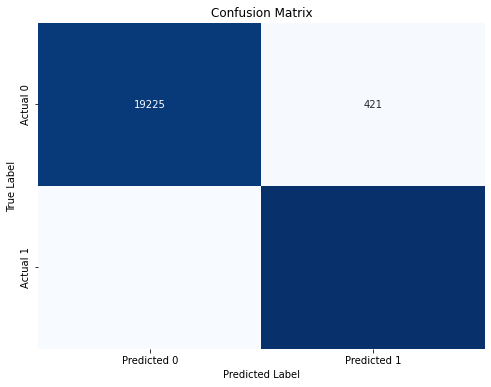

In [57]:
from sklearn.metrics import confusion_matrix

# Use the best model to make predictions on the test set
y_test_pred = best_model.predict(X_test_selected)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix on Test Set:")
print(conf_matrix)
